In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [3]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Preview the datasets
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
# Get dataset info
print(customers.info())
print(products.info())
print(transactions.info())

# Check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Summary statistics
print(customers.describe(include='all'))
print(products.describe(include='all'))
print(transactions.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

**Data Cleaning**

In [5]:
print(customers.duplicated().sum())  # Check duplicates in Customers
print(products.duplicated().sum())  # Check duplicates in Products
print(transactions.duplicated().sum())  # Check duplicates in Transactions


0
0
0


In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])



**Merge Datasets**

In [7]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

**Exploratory Data Analysis**

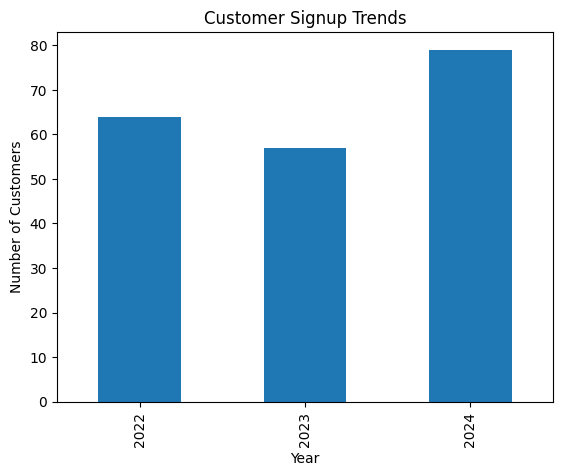

In [8]:
# Customer Anaylsis
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
signup_trends.plot(kind='bar', title='Customer Signup Trends')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()



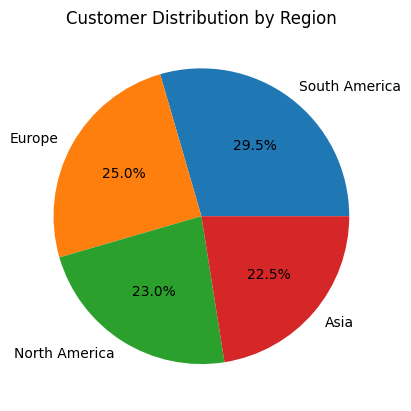

In [9]:
region_distribution = customers['Region'].value_counts()
region_distribution.plot(kind='pie', autopct='%1.1f%%', title='Customer Distribution by Region')
plt.ylabel('')
plt.show()


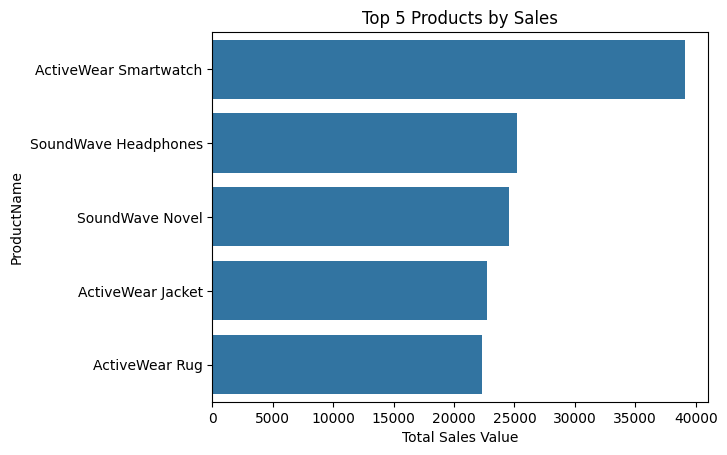

In [10]:
# Product Analysis
top_products = data.groupby('ProductName')['TotalValue'].sum().nlargest(5)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 5 Products by Sales')
plt.xlabel('Total Sales Value')
plt.show()


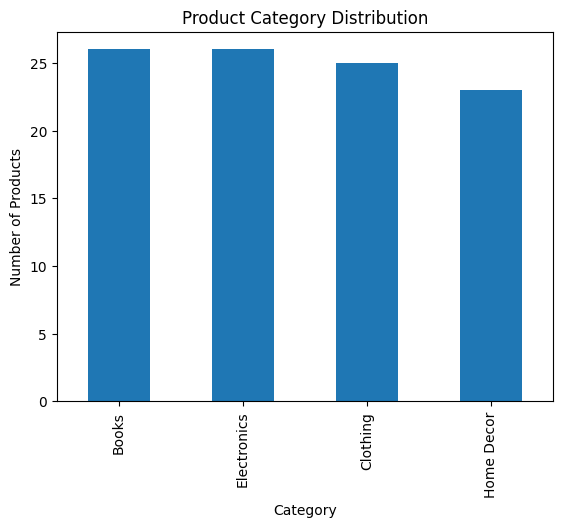

In [11]:
category_distribution = products['Category'].value_counts()
category_distribution.plot(kind='bar', title='Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()


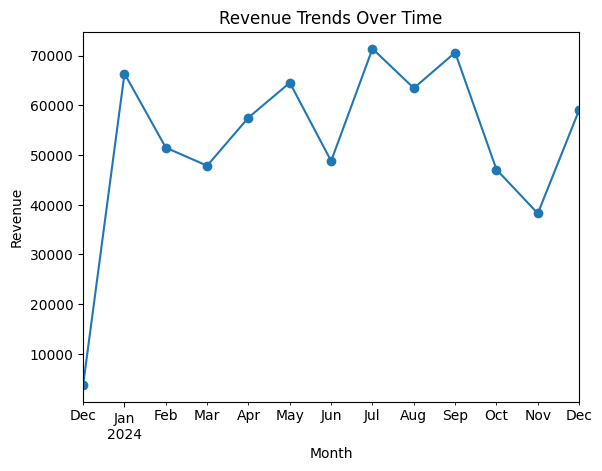

In [12]:
# Transaction Analysis
#Revenue Trends Over Time:
data['TransactionMonth'] = data['TransactionDate'].dt.to_period('M')
revenue_trends = data.groupby('TransactionMonth')['TotalValue'].sum()
revenue_trends.plot(kind='line', title='Revenue Trends Over Time', marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


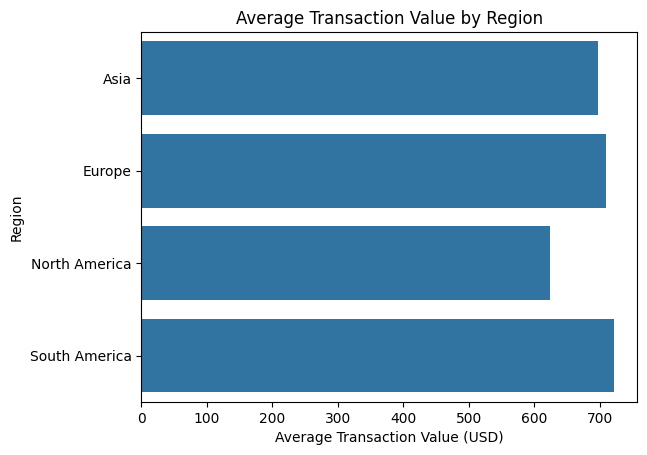

In [13]:
#Average Transaction Value by Region:

avg_transaction_value = data.groupby('Region')['TotalValue'].mean()
sns.barplot(x=avg_transaction_value.values, y=avg_transaction_value.index)
plt.title('Average Transaction Value by Region')
plt.xlabel('Average Transaction Value (USD)')
plt.ylabel('Region')
plt.show()


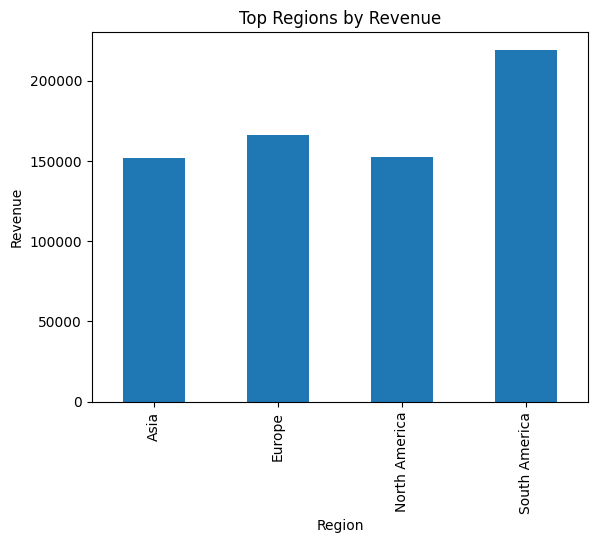

In [14]:
revenue_by_region = data.groupby('Region')['TotalValue'].sum()
revenue_by_region.plot(kind='bar', title='Top Regions by Revenue')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()


In [17]:
print(data.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'TransactionMonth'],
      dtype='object')


**Correlations**

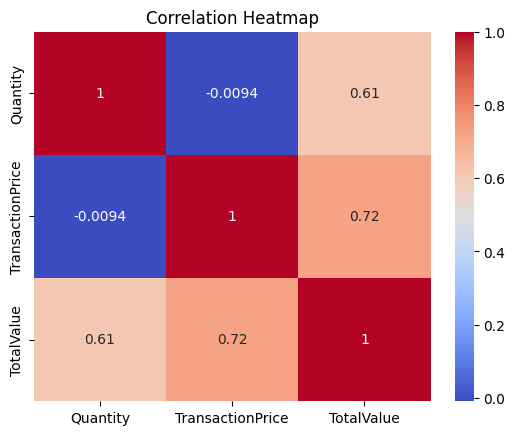

In [18]:
data.rename(columns={'Price_x': 'TransactionPrice', 'Price_y': 'ProductPrice'}, inplace=True)
correlation_matrix = data[['Quantity', 'TransactionPrice', 'TotalValue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
